This notebook uses the model to predict test data (scan 2). Then makes 3D model of segmented aorta for visualisation

1/1 [==============================] - 0s 241ms/step


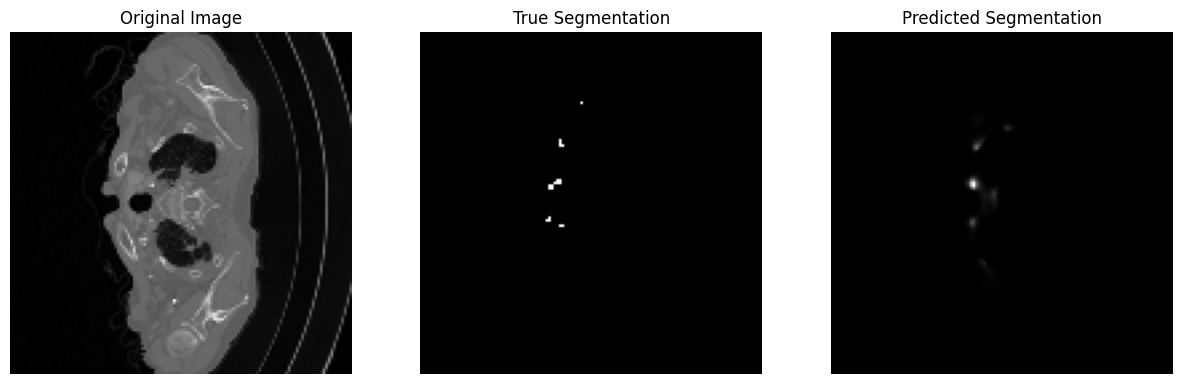

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the model
model = tf.keras.models.load_model('Saved_models/Small_unet_model.h5')

def load_and_preprocess_image(image_path, target_size):
    image = load_img(image_path, color_mode='grayscale', target_size=target_size)
    image = img_to_array(image)
    image = image / 255.0  # Normalize to [0, 1]
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Define the paths
image_path = 'sliced/test/scan2/slice_595.png'
segmentation_path = 'sliced/test/scan2/slice_seg595.png'

# Define the target size (input size of the model)
target_size = (128, 128)

# Load and preprocess the input image and the true segmentation
input_image = load_and_preprocess_image(image_path, target_size)
true_segmentation = load_and_preprocess_image(segmentation_path, target_size)

# Remove the batch dimension for true segmentation for visualization
true_segmentation = np.squeeze(true_segmentation, axis=0)

# Predict the segmentation
predicted_segmentation = model.predict(input_image)
predicted_segmentation = np.squeeze(predicted_segmentation, axis=0)  # Remove batch dimension
# Plot the images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original Image
axes[0].imshow(np.squeeze(input_image, axis=0), cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# True Segmentation
axes[1].imshow(true_segmentation, cmap='gray')
axes[1].set_title('True Segmentation')
axes[1].axis('off')

# Predicted Segmentation
axes[2].imshow(predicted_segmentation, cmap='gray')
axes[2].set_title('Predicted Segmentation')
axes[2].axis('off')

plt.show()

In [2]:
import os

# Create the directory for saving predicted segmentations
output_dir = 'Predicted_slices/Small_unet_model'
os.makedirs(output_dir, exist_ok=True)

# Get the list of image files in the folder
image_files = os.listdir('sliced/test/scan2/')
image_files = [file for file in image_files if file.startswith('slice_')]

# Iterate over each image
for image_file in image_files:
    # Form the paths for the current image and segmentation
    image_path = os.path.join('sliced/test/scan2/', image_file)
    segmentation_file = 'slice_seg' + image_file[6:]
    segmentation_path = os.path.join('sliced/test/scan2/', segmentation_file)

    # Load and preprocess the input image
    input_image = load_and_preprocess_image(image_path, target_size)

    # Predict the segmentation
    predicted_segmentation = model.predict(input_image)
    # predicted_segmentation = np.squeeze(predicted_segmentation, axis=0)  # Remove batch dimension

    predicted_segmentation = np.squeeze(predicted_segmentation, axis=0)  # Remove batch dimension
    predicted_segmentation = np.squeeze(predicted_segmentation, axis=-1)  # Remove last dimension

    # print(predicted_segmentation.shape)
    output_path = os.path.join(output_dir, segmentation_file)
    plt.imsave(output_path, predicted_segmentation, cmap='gray')

1/1 [==============================] - 0s 56ms/step


In [ ]:
import os
import numpy as np
from skimage import io

# Directory containing the images with central pixels
input_dir = 'Predicted_slices/Small_unet_model'

# Initialize an empty list to store the binary arrays
binary_arrays = []

# Loop through each image in the input directory
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.png'):
        # Load the image
        image_path = os.path.join(input_dir, filename)
        image = io.imread(image_path, as_gray=True)

        # Convert the image to a binary array
        binary_array = (image > 0.8).astype(np.uint8)

        # Add the binary array to the list
        binary_arrays.append(binary_array)

# Stack the binary arrays along the third dimension to form a 3D binary array
binary_volume = np.stack(binary_arrays, axis=2)

# Save the 3D binary numpy array
output_path = '3D_scan2_small_unet_model_prediction.npy'
np.save(output_path, binary_volume)

print(f"3D binary numpy array saved successfully as '{output_path}'.")

In [ ]:
import os
import numpy as np
from skimage import io

# Directory containing the images with central pixels
input_dir = 'Predicted_slices/Small_unet_model'

# Initialize an empty list to store the binary arrays
binary_arrays = []

# Loop through each image in the input directory
for filename in sorted(os.listdir(input_dir)):
    if filename.endswith('.png'):
        # Load the image
        image_path = os.path.join(input_dir, filename)
        image = io.imread(image_path, as_gray=True)

        # Convert the image to a binary array
        binary_array = (image > 0.8).astype(np.uint8)

        # Add the binary array to the list
        binary_arrays.append(binary_array)

# Stack the binary arrays along the third dimension to form a 3D binary array
binary_volume = np.stack(binary_arrays, axis=2)

# Save the 3D binary numpy array
output_path = '3D_scan2_small_unet_model_prediction.npy'
np.save(output_path, binary_volume)

print(f"3D binary numpy array saved successfully as '{output_path}'.")